## Quickstart example

In the following example, we use the "test" MRIO of the pymrio module,
which doesn't require to load additional data and has a low number of sectors and
regions, allowing fast computation.

<Axes: xlabel='step'>

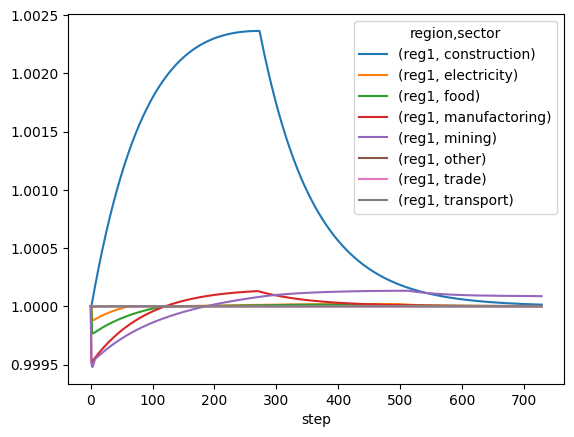

In [1]:
# import pymrio for the test MRIO
import pymrio

# import the different classes
from boario.simulation import Simulation  # Simulation wraps the model
from boario.extended_models import ARIOPsiModel  # The core of the model

from boario.event import EventKapitalRebuild  # A class defining a shock on capital

# Load the IOSystem from pymrio
mrio = pymrio.load_test().calc_all()

# Instantiate the model and the simulation
model = ARIOPsiModel(mrio)
sim = Simulation(model,n_temporal_units_to_sim=730)

# Instantiate an event.
ev = EventKapitalRebuild.from_scalar_regions_sectors(
  impact=500000,
  regions=["reg1"],
  sectors=["manufactoring", "mining"],
  impact_sectoral_distrib = "gdp",
  rebuilding_sectors={"construction": 0.55,"manufactoring": 0.45},
  rebuilding_factor=1.0,
  rebuild_tau=90,
)

# Add the event to the simulation
sim.add_event(ev)

# Launch the simulation
sim.loop(progress=False)

# You should be able to generate a dataframe of
# the production with the following line
df = sim.production_realised
# This allows to normalize production at its initial level
df = df / df.loc[0]

df.loc[:, ("reg1", slice(None))].plot()